<a href="https://colab.research.google.com/github/Gladiator07/Natural-Language-Processing/blob/main/Basics/Word2vec/w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gensim Word2Vectors

## Training a word2vec model


First, let's see how to train a model on the text you have. The text maybe from crawled webpages, newspaper, or anything. Here, we will consider a speech data

In [1]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [3]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [4]:
# preparing the dataset
sentences = nltk.sent_tokenize(text)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

In [5]:
# training the word2vec model
model = Word2Vec(sentences, min_count=1)

# min_count ==> ignore all words with total frequency lower than this

In [6]:
words = model.wv.vocab

In [7]:
words

{',': <gensim.models.keyedvectors.Vocab at 0x7f2164d00c10>,
 '.': <gensim.models.keyedvectors.Vocab at 0x7f2164e97a10>,
 '?': <gensim.models.keyedvectors.Vocab at 0x7f2164d03950>,
 'achievements': <gensim.models.keyedvectors.Vocab at 0x7f2164cff410>,
 'alexander': <gensim.models.keyedvectors.Vocab at 0x7f2164d00ed0>,
 'also': <gensim.models.keyedvectors.Vocab at 0x7f2164cffe10>,
 'among': <gensim.models.keyedvectors.Vocab at 0x7f2164cffd90>,
 'anyone': <gensim.models.keyedvectors.Vocab at 0x7f2164d00510>,
 'areas': <gensim.models.keyedvectors.Vocab at 0x7f2164cff450>,
 'believe': <gensim.models.keyedvectors.Vocab at 0x7f2164d03d90>,
 'brahm': <gensim.models.keyedvectors.Vocab at 0x7f2164cfb5d0>,
 'british': <gensim.models.keyedvectors.Vocab at 0x7f2164d00d90>,
 'build': <gensim.models.keyedvectors.Vocab at 0x7f2164d03250>,
 'came': <gensim.models.keyedvectors.Vocab at 0x7f2164d00290>,
 'captured': <gensim.models.keyedvectors.Vocab at 0x7f2164d00d50>,
 'career': <gensim.models.keyedvect

In [8]:
# finding word vectors
vector = model.wv['war']
len(vector)

100

In [9]:
# most similar words
model.wv.most_similar('vikram')

[('anyone', 0.23211625218391418),
 ('economic', 0.2154756784439087),
 ('nation', 0.1997736692428589),
 ('people', 0.1759175807237625),
 ('material', 0.17537939548492432),
 ('one', 0.1726606786251068),
 ('development', 0.16919977962970734),
 ('respect', 0.16250136494636536),
 ('areas', 0.15091685950756073),
 ('power', 0.1494726687669754)]

In [10]:
model.wv.most_similar('protect')

[('percent', 0.2077595293521881),
 ('anyone', 0.1918070912361145),
 ('culture', 0.17498159408569336),
 ('dhawan', 0.16762061417102814),
 ('british', 0.16732224822044373),
 ('also', 0.1610841453075409),
 ('globally', 0.16072183847427368),
 ('world', 0.15127117931842804),
 ('gdp', 0.1509707123041153),
 ('falling', 0.15032397210597992)]

This was trained on just a single paragraph. So, don't expect this to be much accurate. But this might have given you a idea that how do we train a model, given a dataset

In [11]:
# saving the model
model.save("word2vec.model")

If you save the model you can continue training later

In [12]:
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)

(0, 2)

The trained word vectors are stored in KeyedVectors instance, as model.vw:


In [15]:
vector = model.wv["freedom"]
sims = model.wv.most_similar('freedom', topn=10)
print(sims)

[('enforce', 0.2670506536960602), ('dept', 0.22238799929618835), ('sarabhai', 0.20317837595939636), ('today', 0.2017226219177246), ('areas', 0.19843047857284546), ('strong', 0.1935480386018753), ('professor', 0.1670626848936081), ('turks', 0.1620129644870758), ('?', 0.16126951575279236), ('lucky', 0.1596313863992691)]


The reason for separating the trained vectors into KeyedVectors is that if you don’t need the full model state any more (don’t need to continue training), its state can discarded, keeping just the vectors and their keys proper.

This results in a much smaller and faster object that can be mmapped for lightning fast loading and sharing the vectors in RAM between processes:

In [19]:
from gensim.models import KeyedVectors

# store just the words + their trained embeddings
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

# load back with memory-mapping = read-only, shared across processes
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

vector = wv['free']  # get numpy vector of a word
print(vector)

[-0.00456615 -0.00243256 -0.00080683  0.00473431 -0.00419337 -0.00373844
 -0.00214053  0.00433179 -0.00479458  0.00187782 -0.00080812 -0.0041776
  0.00254457 -0.00151781 -0.00224288 -0.00274347 -0.00058027 -0.00384388
  0.00368671 -0.0015281   0.00245251 -0.00105321 -0.00314548  0.00280265
  0.00478992 -0.00499142  0.00318914  0.00199495 -0.00147517 -0.00479895
 -0.00234535 -0.00160369 -0.00144158 -0.0007067   0.00069493 -0.00188146
  0.00164087  0.00118216 -0.00332863 -0.00185804  0.00459758 -0.00024809
 -0.00064682 -0.00388866 -0.00078327  0.00271599 -0.00108013  0.00317218
  0.00062021  0.00062944  0.0010101   0.00495333  0.00445647 -0.00432989
 -0.00491688 -0.00056242  0.00383044  0.00388445 -0.00020155  0.00150588
  0.00069443 -0.00147028  0.00062113 -0.00152082  0.00325965 -0.00428031
 -0.00341681 -0.00423593 -0.0016625   0.00048834  0.00459484 -0.00480039
 -0.00318155 -0.00261142 -0.00081028  0.00471364 -0.00470995 -0.00382967
  0.00058213  0.00287909 -0.00180657  0.00111537 -0.

#### For embedding with multiword ngrams, refer [this](https://radimrehurek.com/gensim/models/word2vec.html#embeddings-with-multiword-ngrams)

## Pretrained models

In [20]:
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [21]:
# download "glove-twitter-25" embeddings
glove_vectos = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [24]:
# use the downloaded vectors as usual
glove_vectos.most_similar('twitter')

[('facebook', 0.9480051398277283),
 ('tweet', 0.9403422474861145),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104823470115662),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885936141014099),
 ('tweets', 0.8878157734870911),
 ('tl', 0.8778461813926697),
 ('link', 0.877821147441864),
 ('internet', 0.8753897547721863)]

In [26]:
glove_vectos.most_similar('obama')

[('romney', 0.9566565155982971),
 ('president', 0.9400959014892578),
 ('barack', 0.9376798272132874),
 ('clinton', 0.928589940071106),
 ('says', 0.9087843298912048),
 ('bill', 0.9080008864402771),
 ('claims', 0.9074634909629822),
 ('hillary', 0.888924777507782),
 ('talks', 0.8864544034004211),
 ('government', 0.8833803534507751)]

## Gensim word vector visualization of various word vectors

In [52]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

First, let's download the GloVe word vectors by stanford. 
GloVe vectors can be converted to word2vec format. To know more about GloVe, read [this](https://nlp.stanford.edu/projects/glove/)

In [30]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2021-04-05 06:00:00--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-05 06:00:01--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.12MB/s    in 2m 40s  

2021-04-05 06:02:41 (5.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [31]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [32]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [33]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [34]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [35]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [36]:
# gives non-similar words to banana
model.most_similar(negative='banana')

[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

![](https://www.ed.ac.uk/files/styles/landscape_breakpoints_theme_uoe_mobile_1x/public/thumbnails/image/diagram-20190710.png?itok=9oAxK0yB)

In [37]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [41]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1,x2], negative=[x1])
    return result[0][0]

In [43]:
analogy('japan', 'japanese', 'india')

'indian'

In [44]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [45]:
analogy('tall', 'tallest', 'long')

'longest'

In [46]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [47]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [53]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

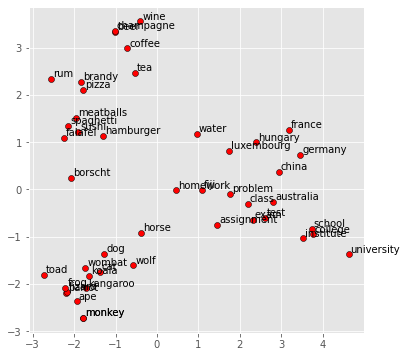

In [54]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

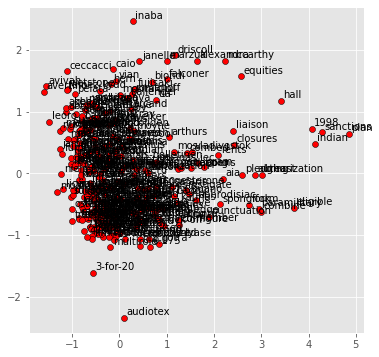

In [55]:
display_pca_scatterplot(model, sample=300)